In [1]:
import warnings
warnings.filterwarnings('ignore')
#lib
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv as read
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
#open
path='../input/Dataset_spine.csv'
data=read(path,delimiter=",")


In [4]:
pd.set_option('display.max_columns',100)
data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [5]:
data.keys()

Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Class_att', 'Unnamed: 13'],
      dtype='object')

In [6]:
data.shape

(310, 14)

In [7]:
#copy in work dataset
dataset=data.iloc[:,0:12]

In [8]:
dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171


In [9]:
target=data['Class_att']

In [10]:
target.head()

0    Abnormal
1    Abnormal
2    Abnormal
3    Abnormal
4    Abnormal
Name: Class_att, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,target,random_state=0)

In [12]:
# 1. neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)#1
knn.fit(X_train,y_train)

# 1. testing
#np.mean(y_pred == y_test))) #alternative
#knn.score(X_test, y_test)
print("In learn dataset: {:.3f}".format(knn.score(X_train, y_train)))
print("In test dataset: {:.3f}".format(knn.score(X_test, y_test)))

In learn dataset: 0.918
In test dataset: 0.846


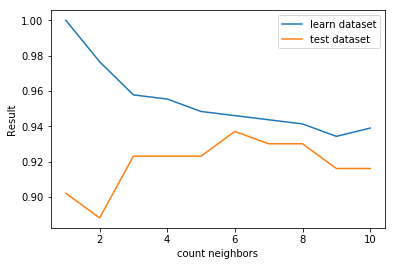

In [13]:
#Test of neighbors
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
#  n_neighbors between 1 and 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # write learn
    training_accuracy.append(clf.score(X_train, y_train))
    # write test
    test_accuracy.append(clf.score(X_test, y_test))
  
plt.plot(neighbors_settings, training_accuracy, label="learn dataset")
plt.plot(neighbors_settings, test_accuracy, label="test dataset")
plt.ylabel("Result")
plt.xlabel("count neighbors")
plt.legend()

In [14]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(dataset,target,random_state=0)
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)
print("In learn dataset: {:.3f}".format(forest.score(X_train, y_train)))
print("In test dataset: {:.3f}".format(forest.score(X_test, y_test)))

In learn dataset: 1.000
In test dataset: 0.795


In [15]:
from sklearn.neural_network import MLPClassifier
X_train,X_test,y_train,y_test=train_test_split(dataset,target,random_state=0)
mlp = MLPClassifier(max_iter=1000,solver='lbfgs', random_state=0,hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
print("In learn dataset: {:.3f}".format(mlp.score(X_train, y_train)))
print("In test dataset: {:.3f}".format(mlp.score(X_test, y_test)))

In learn dataset: 0.897
In test dataset: 0.808


In [16]:
#try scaler for neural
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit 
scaler.fit(X_train)
# transform train
X_train_scaled = scaler.transform(X_train)
# transform test
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.neural_network import MLPClassifier
X_train,X_test,y_train,y_test=train_test_split(dataset,target,random_state=0)
mlp = MLPClassifier(max_iter=160,solver='lbfgs',alpha=0.1,random_state=0,hidden_layer_sizes=[45])
mlp.fit(X_train_scaled, y_train)
print("In learn dataset: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("In test dataset: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In learn dataset: 0.987
In test dataset: 0.859


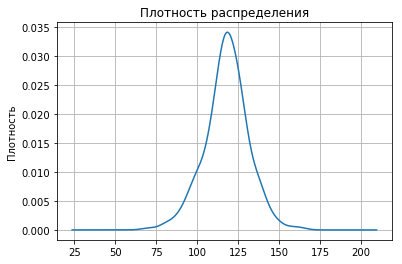

In [18]:
#statistic
data['Col5'].plot(kind='kde')
plt.ylabel('Плотность')
plt.title('Плотность распределения')
plt.grid(True)

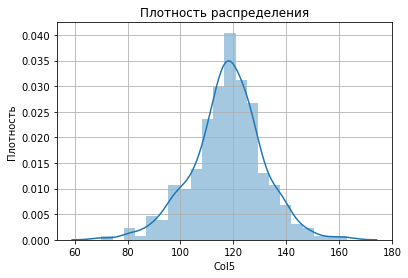

In [19]:
#hist
sns.distplot(data['Col5'])
plt.ylabel('Плотность')
plt.title('Плотность распределения')
plt.grid(True)

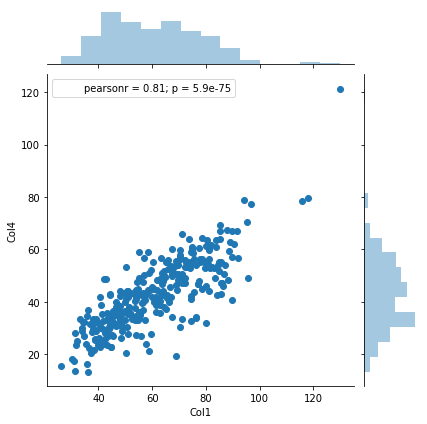

In [20]:
sns.jointplot(x="Col1", y="Col4", data=data )

In [21]:
data.corr()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
Col1,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251
Col2,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550
Col3,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054
Col4,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853
Col5,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145
Col6,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023
Col7,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893
Col8,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021
Col9,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541
Col10,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243


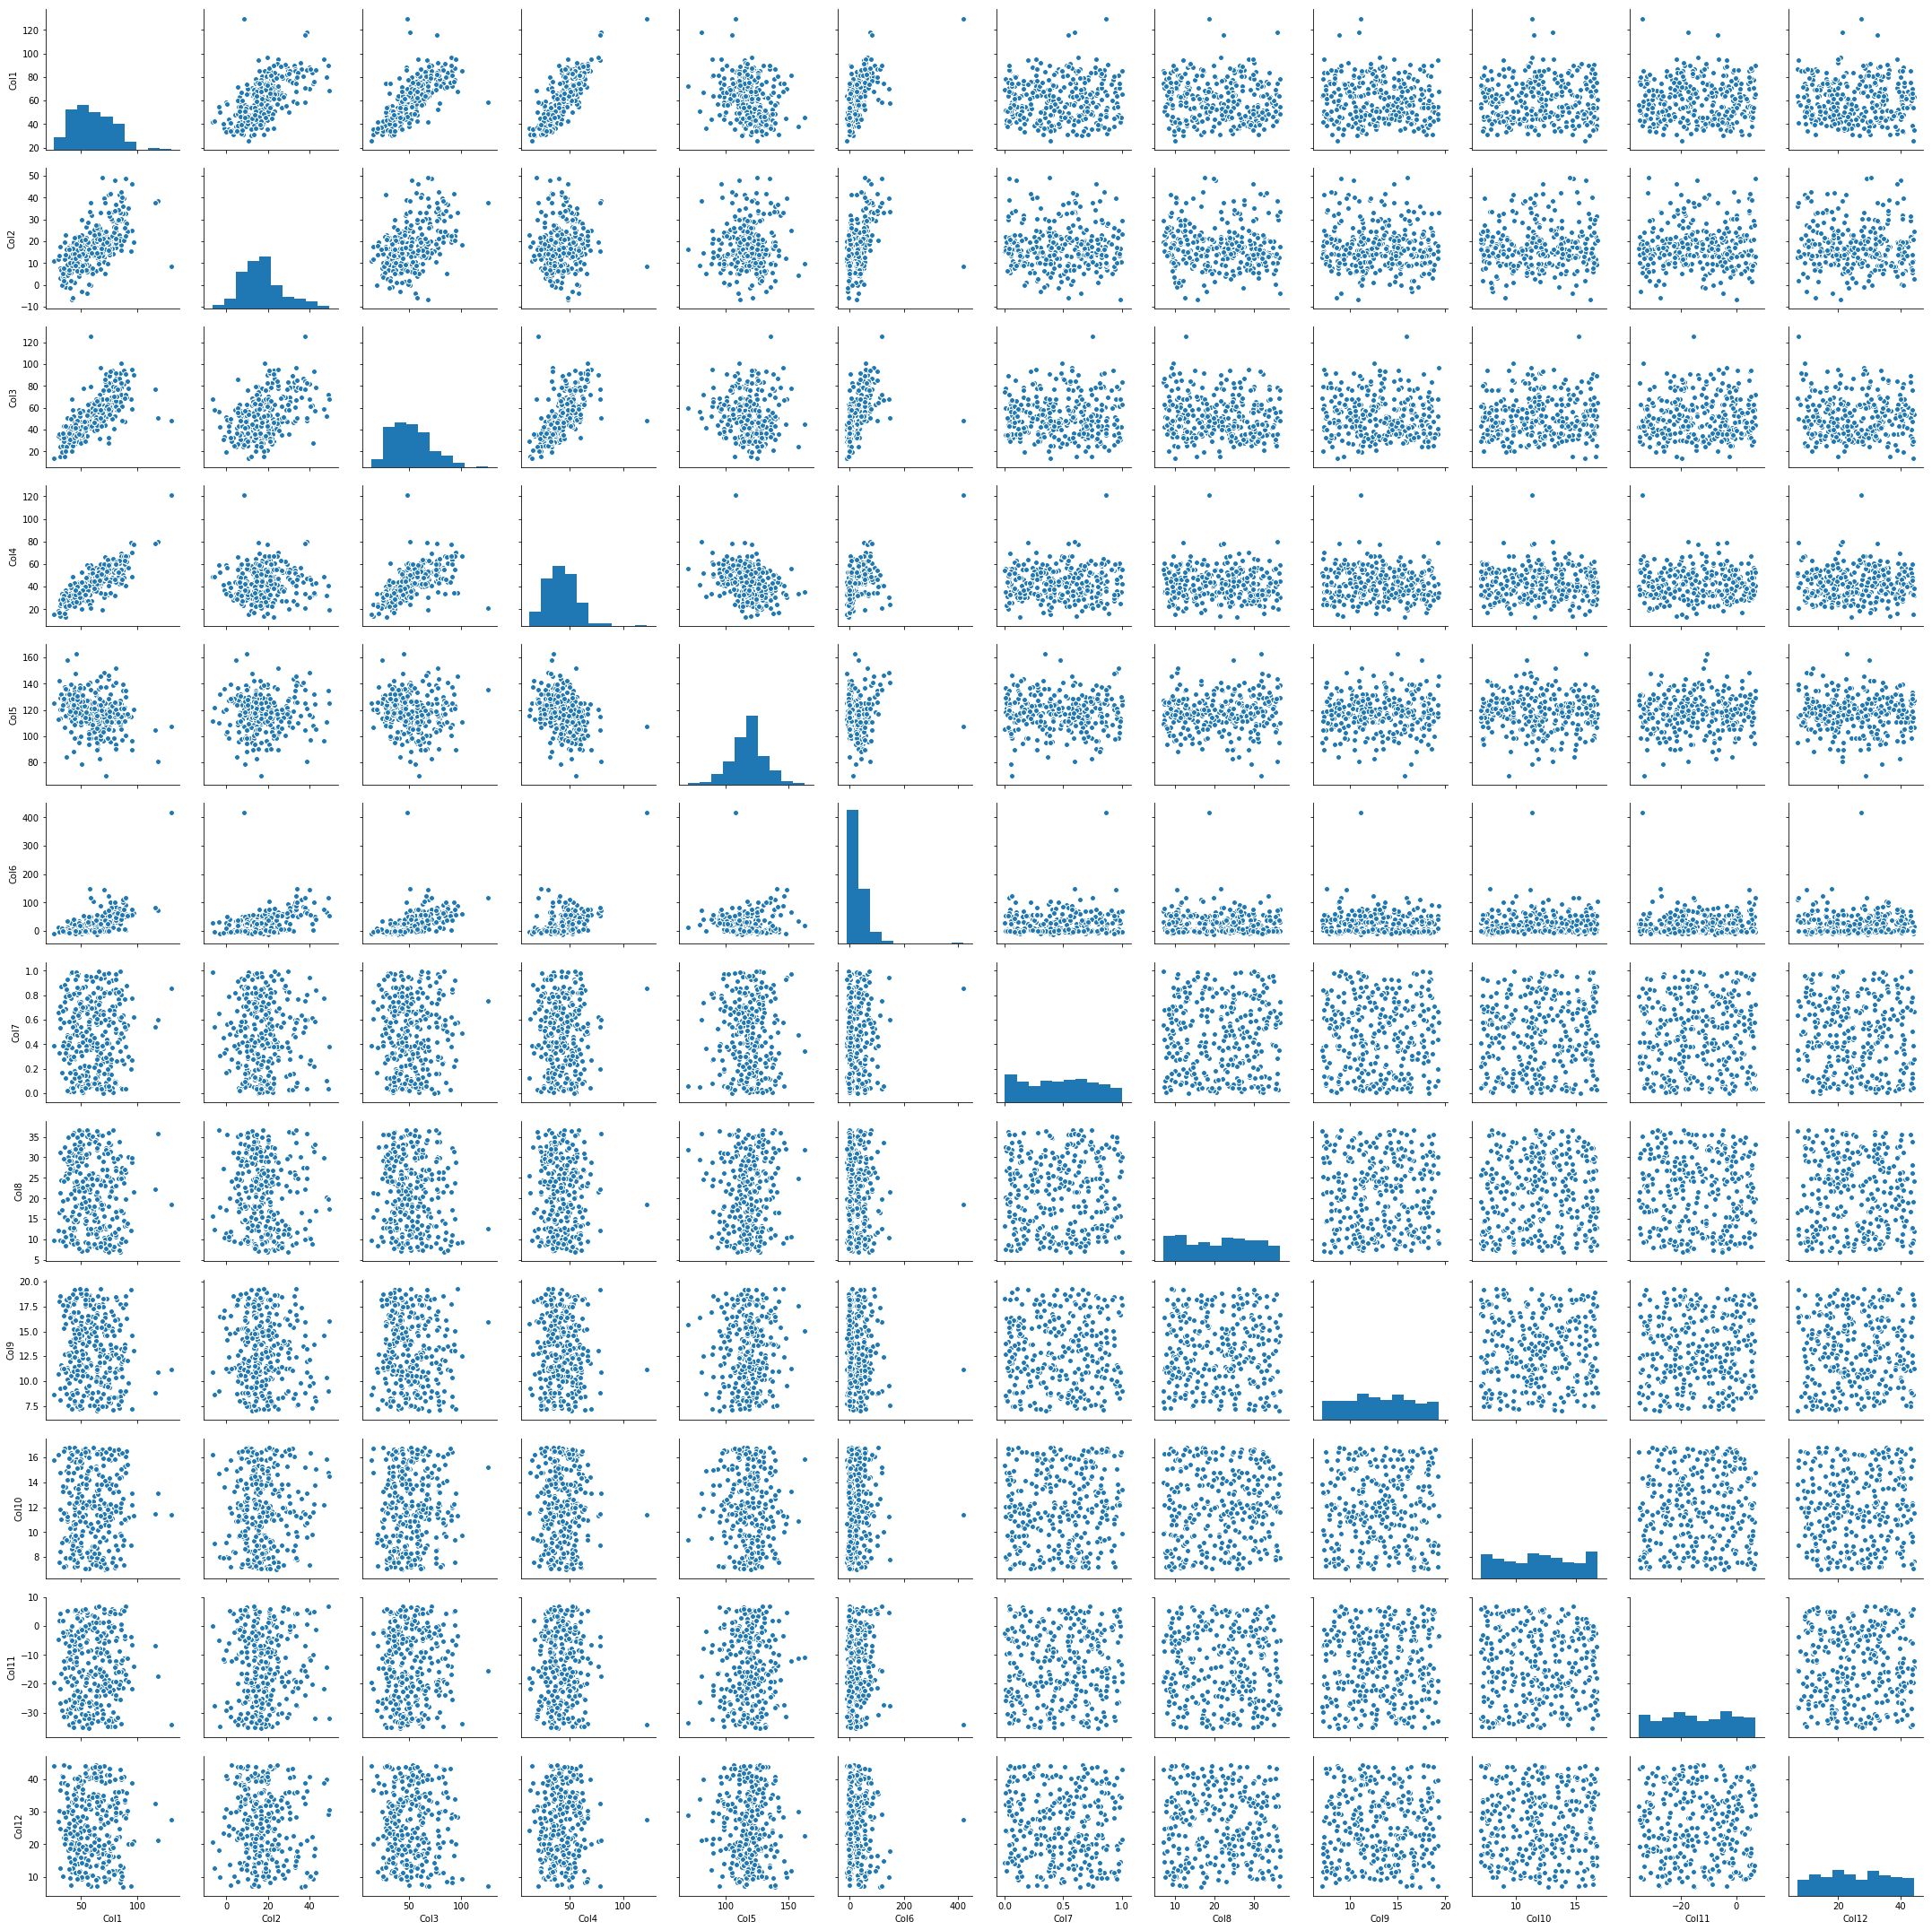

In [22]:
sns.pairplot(dataset)

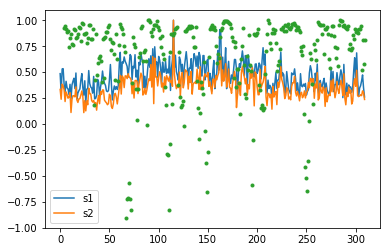

In [23]:
#попытка найти корреляцию в двух сигналах
pd.DataFrame({'s1':dataset.Col1/max(dataset.Col1), 's2':dataset.Col4/max(dataset.Col4)}).plot()
pd.rolling_corr(dataset.Col1/max(dataset.Col1),dataset.Col4/max(dataset.Col4),window=5).plot(style='.')